In [1]:
# Imports
from ipynb.fs.full.BreastFunctions import *
#from BreastFunctions_py import *
import numpy as np
import pandas as pd

def rescale(arr):
    arr_min = arr.min()
    arr_max = arr.max()
    return (arr - arr_min) / (arr_max - arr_min)
def rescale_AB(arr):
    arr_min = arr.min()
    arr_max = arr.max()
    return ( (arr - arr_min) / (arr_max - arr_min)  ) * 255 - 128

# %matplotlib qt

In [2]:
# Colors and functions for colors
def CreateColorMap(NumberofColors , colorsArray ):
    cmap = LinearSegmentedColormap.from_list('cmap', colorsArray, N=NumberofColors)
    return cmap
    
def CreateColorMap_Continuous(NumberofColors , colorsArray ):
    cvals = np.arange(0,NumberofColors-1)
    colors = colorsArray
    norm=plt.Normalize(min(cvals),max(cvals))
    tuples = list(zip(map(norm,cvals), colors))
    cmap = LinearSegmentedColormap.from_list("", tuples)
    
    return cmap

colorarray8=[ "black","olivedrab","gold","darkturquoise", "wheat","fuchsia","indigo","#7f0000","#ff7f00"]
colorsarray7 = [ "black","olivedrab","gold","darkturquoise", "wheat","fuchsia","indigo","#7f0000"]
colorsarray6 = [ "black","olivedrab","gold","darkturquoise", "wheat","fuchsia","indigo"]
colorsarray5 = [ "black","olivedrab","gold","darkturquoise", "wheat","fuchsia"]

colorsarrayTSNE = ["olivedrab","gold","darkturquoise", "wheat","fuchsia","indigo","#7f0000","#ff7f00"]
colorsarray_5_TSNE = ["olivedrab","gold","darkturquoise", "wheat","fuchsia"]
colorsarray_6_TSNE = ["olivedrab","gold","darkturquoise", "wheat","fuchsia","indigo"]
colorsarray_7_TSNE = ["olivedrab","gold","darkturquoise", "wheat","fuchsia","indigo","#7f0000"]

cmap8 = CreateColorMap(9,colorarray8)
cmapTSNE= CreateColorMap(8,colorsarrayTSNE)

cmap7 = CreateColorMap(8,colorsarray7)
cmap7_TSNE=CreateColorMap(7,colorsarray_7_TSNE )

cmap6 = CreateColorMap(7,colorsarray6)
cmap6_TSNE = CreateColorMap(6,colorsarray_6_TSNE)

cmap5 = CreateColorMap(6,colorsarray5)
cmap5_TSNE = CreateColorMap(5,colorsarray_5_TSNE)


In [3]:
# Only load if needed to load total results from previous runs to continue on
total_results_dataframe_norm_SVM = pd.read_csv("total_breastCancer_results_norm_SVM.csv")
total_results_dataframe_norm_KNN = pd.read_csv("total_breastCancer_results_norm_KNN.csv")

# Prepare this dataframe (total results) only once
# total_results_dataframe_norm_SVM = pd.DataFrame(columns=["Patient to be predicted/left out" , "Metastasis-Free Subpopulation" , "Metastasis Subpopulation" , "Predicted Metastasis" ,
# "Metastasis Status", "Number of Clusters" , "SAM Features for each tSNE run on new subset"])

# total_results_dataframe_norm_KNN= pd.DataFrame(columns=["Patient to be predicted/left out" , "Metastasis-Free Subpopulation" , "Metastasis Subpopulation" , "Predicted Metastasis" ,
# "Metastasis Status", "Number of Clusters" , "SAM Features for each tSNE run on new subset"])



In [4]:
# Reading Data
HE_image , MSI_data_cube , goodlist, peak_list, pixel_to_sample_ID, sample_only_data , sample_ID_pixels = ReadBreastData()

In [5]:
## Selecting Patient as test
testPatient_ID = 11
#-------------------------------------------------------

# Splitting data into train and test and scaled and non_scaled
train_scaled_data,train_data,train_ID_pixels,test_scaled_data,test_data,test_ID_pixels = SplitData(ID = testPatient_ID ,
        sample_only_data = sample_only_data,
        sample_ID_pixels = sample_ID_pixels )

scaler = MinMaxScaler()
train_normalized_data = scaler.fit_transform(train_data)

In [64]:
# Run tSNE Model

# tsne_results = tSNE(train_scaled_data)
# np.save("patient_TSNE/BreastCancer_tSNE_Normalized_Model_Patient_{}".format(testPatient_ID) , tsne_results)

In [6]:
# Load tSNE model instead of running model if needed
tsne_results = np.load("patient_TSNE/BreastCancer_tSNE_Normalized_Model_Patient_{}.npy".format(testPatient_ID))

C:\Users\dell\anaconda3\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 1318 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


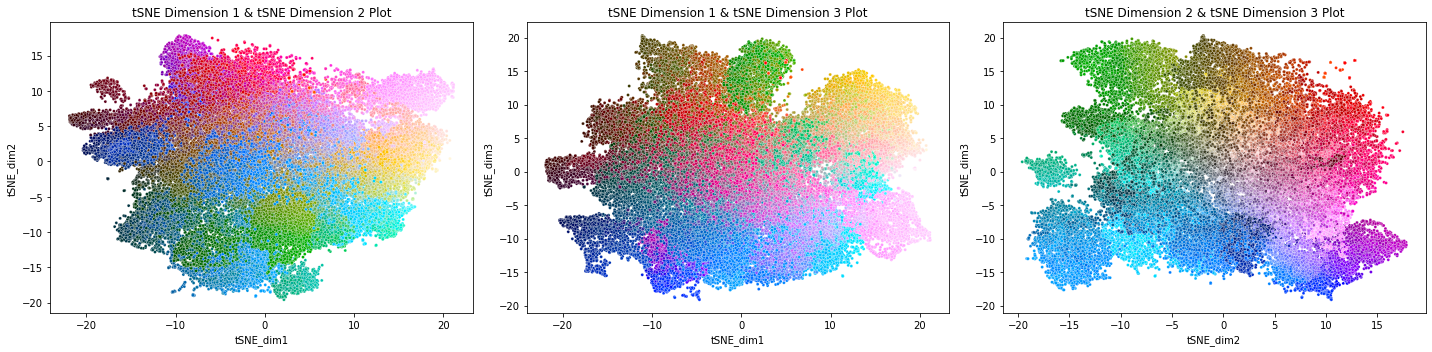

In [7]:
# Visualize tSNE in 2D

tsne_df = pd.DataFrame(data=tsne_results[:],columns=["tSNE_dim1","tSNE_dim2","tSNE_dim3"])
tsne_df['pixel_ID'] = train_ID_pixels
tsne_df['L_Component'] = tsne_results[:,0]
tsne_df['A_Component'] = tsne_results[:,1]
tsne_df['B_Component'] = tsne_results[:,2]

LAB_mapping = [ tsne_df['L_Component'] , tsne_df['A_Component'] , tsne_df['B_Component'] ]
LAB_colors = np.asarray(LAB_mapping)
LAB_colors = LAB_colors.swapaxes(0,1)

L = rescale(LAB_colors[:,0]) * 100
A = rescale_AB(LAB_colors[:,1])
B = rescale_AB(LAB_colors[:,2])
LAB_colors = np.asarray( [ L , A, B ] )
LAB_colors = LAB_colors.swapaxes(0,1)
RGB_colors = lab2rgb(LAB_colors)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
# sns.set(rc = {'figure.figsize':(15,8)})
marker_size = 9

sns.scatterplot(
    ax = axes[0],
    x = "tSNE_dim1", y="tSNE_dim2",
    c = RGB_colors,
    s = marker_size,
    data = tsne_df
)
axes[0].set_title("tSNE Dimension 1 & tSNE Dimension 2 Plot")

sns.scatterplot(
    ax = axes[1],
    x = "tSNE_dim1", y="tSNE_dim3",
    c = RGB_colors,
    s = marker_size,
    data = tsne_df
)
axes[1].set_title("tSNE Dimension 1 & tSNE Dimension 3 Plot")

sns.scatterplot(
    ax = axes[2],
    x = "tSNE_dim2", y="tSNE_dim3",
    c = RGB_colors,
    s = marker_size,
    data = tsne_df
)
axes[2].set_title("tSNE Dimension 2 & tSNE Dimension 3 Plot")



plt.tight_layout()
plt.show()



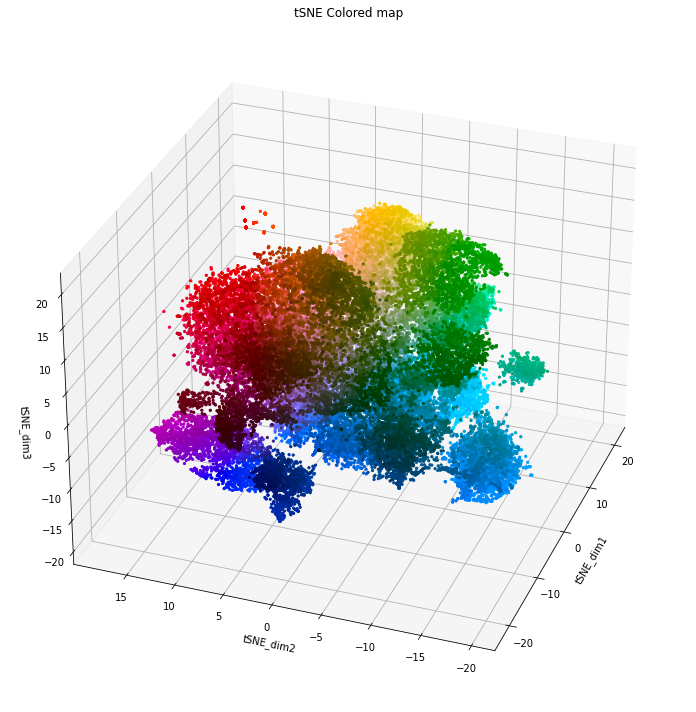

In [22]:
# Visualize tSNE in 3D
# %matplotlib qt
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter_3d = ax.scatter(
    xs=tsne_df['tSNE_dim1'], 
    ys=tsne_df['tSNE_dim2'],
    zs= tsne_df['tSNE_dim3'],
    c = RGB_colors,
    s = 5,
    alpha = 1,
)
# ax.set_xlim(-40,40)
# ax.set_ylim(-40,40)
# ax.set_zlim(-40,40)
ax.set_xlabel('tSNE_dim1')
ax.set_ylabel('tSNE_dim2')
ax.set_zlabel('tSNE_dim3')
ax.set_title("tSNE Colored map")

fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

# elev is z-axis, +ve moves up, -ve moves down
# azim is x axis, +ve moves right, -ve moves left

# ax.view_init(elev = 20 , azim = -160) 
ax.view_init(elev = 30, azim = -160) 
plt.tight_layout()

In [9]:
# Run KMeans clustering from 3 to 10 clusters for metastasis analysis
kmeans_11, kmeans_10, kmeans_9, kmeans_8, kmeans_7, kmeans_6, kmeans_5, kmeans_4, kmeans_3 = KMeans_results(tsne_results)

# For patient 25 only , kmeans_11 is used

In [10]:
# Read Clinical Data
Clinical_data = ReadClinicalData(testPatient_ID , "ClinicalData.xlsx")
Clinical_data_full = pd.read_excel("ClinicalData.xlsx","Breast Cancer Clinical Data")

NonMetastasis: [2. 4. 0. 1. 1. 3. 0. 1. 2. 1. 3.]
Metastasis: [ 5.  2.  5.  2.  7.  7.  2.  1. 13.  2.  5.]


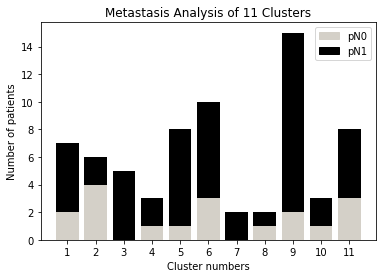

NonMetastasis: [1. 1. 4. 1. 0. 1. 0. 2. 3. 4.]
Metastasis: [ 2. 12.  6.  2.  6.  1.  2.  5.  6.  2.]


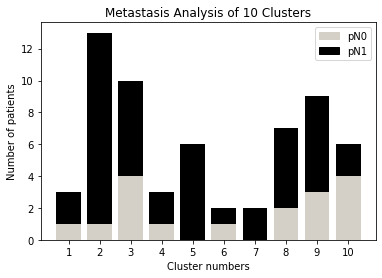

NonMetastasis: [1. 4. 2. 4. 0. 1. 2. 1. 1.]
Metastasis: [10.  1.  3.  6.  7.  1.  6.  2.  1.]


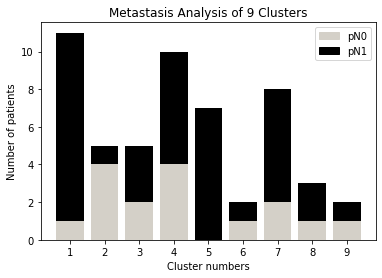

NonMetastasis: [1. 1. 0. 3. 1. 2. 2. 5.]
Metastasis: [2. 1. 7. 5. 8. 6. 3. 2.]


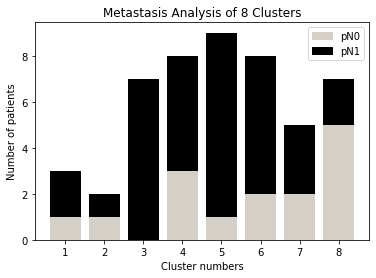

NonMetastasis: [1. 5. 3. 3. 4. 1. 1.]
Metastasis: [8. 4. 1. 6. 4. 7. 2.]


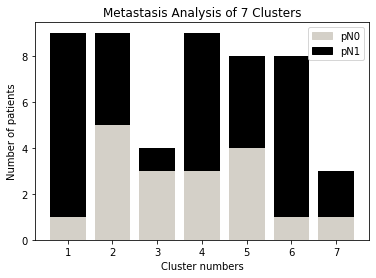

NonMetastasis: [4. 1. 4. 3. 3. 2.]
Metastasis: [5. 8. 4. 1. 3. 6.]


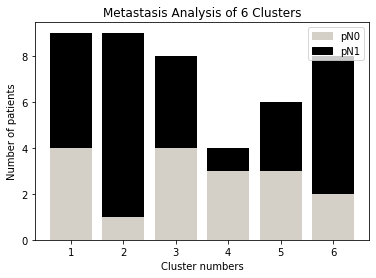

NonMetastasis: [2. 2. 3. 0. 5.]
Metastasis: [3. 2. 7. 8. 5.]


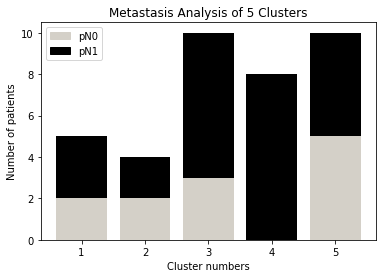

NonMetastasis: [3. 1. 3. 5.]
Metastasis: [ 6.  7. 10.  5.]


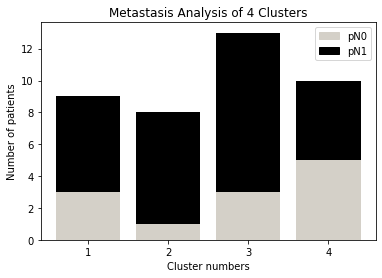

NonMetastasis: [6. 2. 2.]
Metastasis: [ 6. 11.  5.]


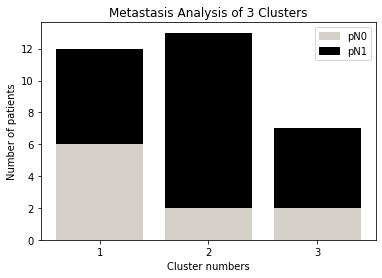

In [11]:
# Plots Non-Metastasis and Metastasis clusters
%matplotlib inline

state011, state111  =   metastasis_status(kmeans_11.labels_, Clinical_data,train_ID_pixels)
state010, state110  =   metastasis_status(kmeans_10.labels_, Clinical_data,train_ID_pixels)
state09,  state19   =   metastasis_status(kmeans_9.labels_, Clinical_data,train_ID_pixels)
state08,  state18   =   metastasis_status(kmeans_8.labels_, Clinical_data,train_ID_pixels)
state07,  state17   =   metastasis_status(kmeans_7.labels_, Clinical_data,train_ID_pixels)
state06,  state16   =   metastasis_status(kmeans_6.labels_, Clinical_data,train_ID_pixels)
state05,  state15   =   metastasis_status(kmeans_5.labels_, Clinical_data,train_ID_pixels)
state04,  state14   =   metastasis_status(kmeans_4.labels_, Clinical_data,train_ID_pixels)
state03,  state13   =   metastasis_status(kmeans_3.labels_, Clinical_data,train_ID_pixels)

# Plots bar plot of Non-Metastasis and Metastasis clusters
plot_metastasis_status(state011, state111)
plot_metastasis_status(state010, state110)
plot_metastasis_status(state09, state19)
plot_metastasis_status(state08, state18)
plot_metastasis_status(state07, state17)
plot_metastasis_status(state06, state16)
plot_metastasis_status(state05, state15)
plot_metastasis_status(state04, state14)
plot_metastasis_status(state03, state13)

# Create dict to save kmeans results and select them later
kmeans_dict = {"11_Clusters": [kmeans_11.labels_,state011] , "10_Clusters": [kmeans_10.labels_,state010],"9_Clusters": [kmeans_9.labels_,state09], "8_Clusters": [kmeans_8.labels_,state08] , "7_Clusters": [kmeans_7.labels_,state07]  , "6_Clusters": [kmeans_6.labels_,state06] , "5_Clusters": [kmeans_5.labels_,state05], "4_Clusters": [kmeans_4.labels_,state04], "3_Clusters": [kmeans_3.labels_,state03]}

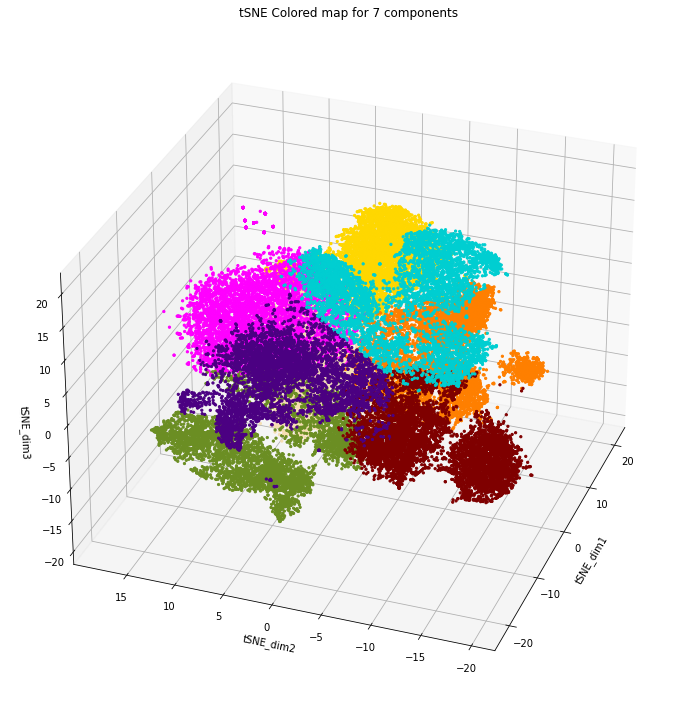

In [23]:
#Clustering Visulaization in t-SNE
# %matplotlib qt
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter_3d = ax.scatter(
    xs=tsne_df['tSNE_dim1'], 
    ys=tsne_df['tSNE_dim2'], 
    zs=tsne_df['tSNE_dim3'], 
    c = kmeans_8.labels_,
    cmap = cmapTSNE,
    s = 5,
    alpha = 1,
)

ax.set_xlabel('tSNE_dim1')
ax.set_ylabel('tSNE_dim2')
ax.set_zlabel('tSNE_dim3')
ax.set_title("tSNE Colored map for 7 components")


# elev is z-axis, +ve moves up, -ve moves down
# azim is x axis, +ve moves right, -ve moves left
ax.view_init(elev = 30, azim = -160) 
plt.tight_layout()

In [24]:
# Select the correct kmeans that shows best results from metastasis analysis, must have one fully metastasis cluster
selected_clusters_value = 8

# ----------------------------------------------------------------------------------

In [25]:
# Detect the fully metastasis cluster, select the correct kmeans that shows best results from metastasis analysis
labels = kmeans_dict[str(selected_clusters_value)+"_Clusters"][0]
selected_state = kmeans_dict[str(selected_clusters_value)+"_Clusters"][1]

fully_metastasis_cluster_label = 0
for cluster in selected_state:
    if not cluster: # Cluster list is empty, has no healthy patients, so it's fully metastasis cluster
        break # fully_metastasis_cluster_label now has the right label, exit loop
    
    fully_metastasis_cluster_label += 1

print("Fully metastasis cluster label's index is {} and it is cluster {}".format(fully_metastasis_cluster_label,fully_metastasis_cluster_label+1))

Fully metastasis cluster label's index is 2 and it is cluster 3


In [54]:
# Manually input fully metastatic cluster label if needed
fully_metastasis_cluster_label = 4

print("Fully metastasis cluster label's index is {} and it is cluster {}".format(fully_metastasis_cluster_label,fully_metastasis_cluster_label+1))

Fully metastasis cluster label's index is 4 and it is cluster 5


In [26]:
# Run R file in order to generate significant proteins using the csv file
protein_dataframe = SAM_Analysis(labels, Clinical_data, train_ID_pixels, fully_metastasis_cluster_label, train_data, peak_list)
protein_dataframe.to_csv("BreastCancerAverageSpectrumValues.csv",index=False)

In [28]:
# Need to read significant protein file outputted from R

SAM_protein = readSignificantProteins("significant_breast_proteins.json",delete=False)
SAM_protein = SAM_protein + readSignificantProteins("significant_breast_proteins_up.json",delete=False)

SAM_protein_indices=[]
for i in range(len(peak_list)):

    if peak_list[i][0] in SAM_protein:
        SAM_protein_indices.append(i)

train_scaled_selected_proteins_data = train_scaled_data[:,SAM_protein_indices]
test_scaled_selected_proteins_data = test_scaled_data[:,SAM_protein_indices]

train_selected_proteins_data = train_data[:,SAM_protein_indices]
test_selected_proteins_data = test_data[:,SAM_protein_indices]

train_labels = TargetLabelsCreation(labels , Clinical_data, train_ID_pixels, fully_metastasis_cluster_label)
print(SAM_protein)

[4965, 5171, 4999, 5067]


In [ ]:
# Visualizing protein intensity in tSNE map

protein_ion = 6650
protein_index = protein_dataframe.columns.get_loc(protein_ion)

cmhot = plt.get_cmap("hot") #name of cmap u want from matplotlib

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter_3d = ax.scatter(
    xs=tsne_df['tSNE_dim1'], 
    ys=tsne_df['tSNE_dim2'], 
    zs=tsne_df['tSNE_dim3'], 
    c = train_data[:,protein_index],
    cmap = cmhot,
    s = 5,
    alpha = 1,
)

ax.set_xlabel('tSNE_dim1')
ax.set_ylabel('tSNE_dim2')
ax.set_zlabel('tSNE_dim3')


# elev is z-axis, +ve moves up, -ve moves down
# azim is x axis, +ve moves right, -ve moves left
ax.view_init(elev = 30 , azim = -150) 
plt.tight_layout()

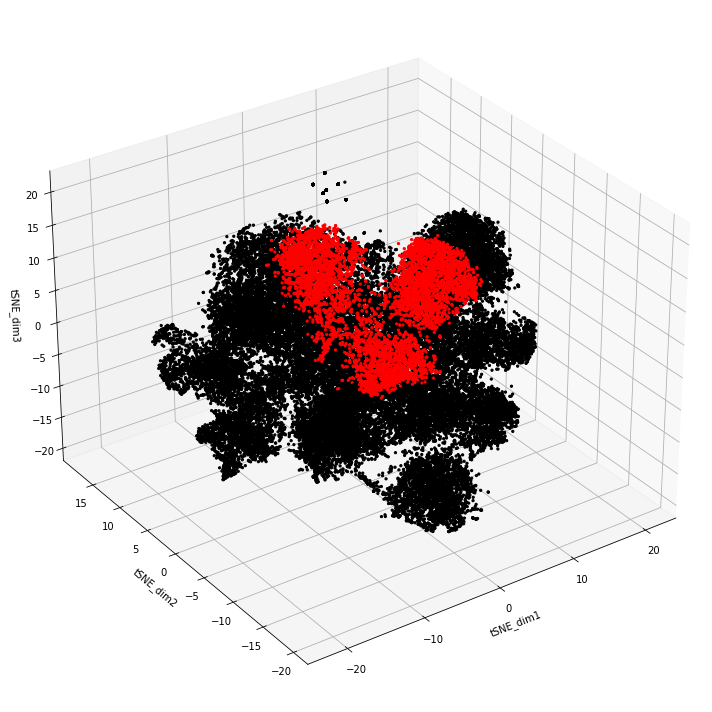

In [27]:
# Visualizing fully metastatic cluster 

cmap_red_black = CreateColorMap(2,["red","black"])

fully_metastasis_labels = copy.deepcopy(labels)
fully_metastasis_indices = np.where(labels == fully_metastasis_cluster_label)[0]
fully_metastasis_labels[fully_metastasis_indices] = -1
fully_metastasis_labels[fully_metastasis_labels != -1] = 0

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter_3d = ax.scatter(
    xs=tsne_df['tSNE_dim1'], 
    ys=tsne_df['tSNE_dim2'], 
    zs=tsne_df['tSNE_dim3'], 
    c = fully_metastasis_labels,
    cmap = cmap_red_black,
    s = 5,
    alpha = 1,
)

ax.set_xlabel('tSNE_dim1')
ax.set_ylabel('tSNE_dim2')
ax.set_zlabel('tSNE_dim3')


# elev is z-axis, +ve moves up, -ve moves down
# azim is x axis, +ve moves right, -ve moves left
ax.view_init(elev = 30, azim = -125) 
plt.tight_layout()

In [48]:
# Creating DataFrame for the Classifier result
# results_dataframe = {"Patient to be predicted/left out" :[] , "Accuracy of Classifier":[], "Precision":[], "Recall":[] ,"F1-Score":[], "ROC AUC":[]}
# df_Classifier_Quality = pd.DataFrame(results_dataframe)

# Load Classifier Quality Results csv
df_Classifier_Quality = pd.read_csv("Breast_Classifier_Quality_Results.csv")


In [33]:
y_pred= SVM("rbf" , 0.1 , train_selected_proteins_data ,  train_labels , test_selected_proteins_data)

In [29]:
from sklearn.model_selection import train_test_split

trainX, testX, trainy, testy = train_test_split(train_selected_proteins_data, train_labels, test_size=0.2, random_state=0)

In [ ]:
# Checking Train accuracy 
from sklearn import svm

#Train the model using the training sets

y_pred_SVM = SVM("rbf" , C_value , trainX , trainy , trainX)

acc_train = accuracy_score(trainy, y_pred_SVM)
print("Accuracy of Train Data :", acc_train)

In [31]:
# SVM Model , predicting labels
from sklearn import svm
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# C_value = 0.1
# y_pred_SVM = SVM("rbf" , C_value , trainX , trainy , testX)

clf = svm.SVC(kernel="rbf"  , C = 0.1, random_state=0)

clf.fit(trainX , trainy)
y_pred_SVM = clf.predict(testX)

# For the ROC curve 
y_pred_SVM_roc= clf.fit(trainX , trainy).decision_function(testX)


In [40]:
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score, precision_score, recall_score

#Calculating accuracy score, precision, recall, f1 for the classifier
val_acc = accuracy_score(testy, y_pred_SVM)
print("Accuracy of Calssifier is:", round(val_acc * 100,2))

precision = round(precision_score(testy, y_pred_SVM),2)
recall= round(recall_score(testy, y_pred_SVM),2)
f1score= round(f1_score(testy, y_pred_SVM),2)

print("Precision: ", precision ) 
print("Recall: ",recall )
print("f1: ", f1score)


Accuracy of Calssifier is: 78.85
Precision:  0.79
Recall:  1.0
f1:  0.88


Breast Cancer SVM: ROC AUC = 0.83


Text(0, 0.5, 'True Positive Rate')

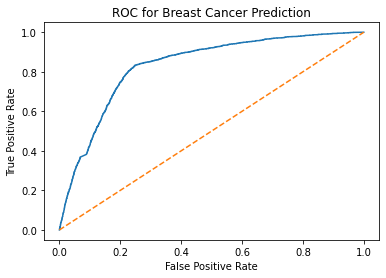

In [56]:
# roc curve for SVM model
fpr, tpr, thresh1 = roc_curve(testy, y_pred_SVM_roc, pos_label=2)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(testy))]
p_fpr, p_tpr, _ = roc_curve(testy, random_probs, pos_label=2)

#AUC Score
auc_score = roc_auc_score(testy , y_pred_SVM_roc)
print('Breast Cancer SVM: ROC AUC =', round(auc_score,2))
auc_score=round(auc_score,2)

plt.plot(fpr,tpr)
plt.plot(p_fpr,p_tpr,linestyle='--')
plt.title("ROC for Breast Cancer Prediction")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [61]:
# Save Quality Analysis to csv file

df_Classifier_Quality["Patient to be predicted/left out"] = [testPatient_ID]
df_Classifier_Quality["Accuracy of Classifier"]= [val_acc]
df_Classifier_Quality["Precision"]= [precision]
df_Classifier_Quality["Recall"]= [recall]
df_Classifier_Quality["F1-Score"]= [f1score]
df_Classifier_Quality["ROC AUC"]= [auc_score]

df_Classifier_Quality.to_csv("Breast_Classifier_Quality_Results.csv",index=False)



In [62]:
df_Classifier_Quality

,Patient to be predicted/left out,Accuracy of Classifier,Precision,Recall,F1-Score,ROC AUC
0,11,0.788506,0.79,1.0,0.88,0.83


In [63]:
# Calculating SVM Probability Metastasis values
Metastasis_prob, Non_Metastasis_prob = ProbabilityCalc(y_pred)
Surv_SVM = [Metastasis_prob , Non_Metastasis_prob]

Metastasis probability : 0 
Non-Metastasis probability : 100.0


In [64]:
# KNN Model, predicting labels
K_value= 2
y_pred_KNN = KNN(K_value, train_selected_proteins_data, train_labels, test_selected_proteins_data)
# 2 , 4 , 8 , 6

In [65]:
# Calculating KNN Probability Metastasis values
Metastasis_prob, Non_Metastasis_prob = ProbabilityCalc(y_pred_KNN)
Surv_KNN = [Metastasis_prob , Non_Metastasis_prob]

Metastasis probability : 1.0739856801909307 
Non-Metastasis probability : 98.92601431980907


In [66]:
# Selecting SVM as outputted results
Selected_model = Surv_SVM
Metastasis_prob = round(Selected_model[0],2)
Non_Metastasis_prob = round(Selected_model[1],2)

In [68]:
# Run after model complete to save the result in the total results dataframe, outputting SVM results in dataframe
total_results_dataframe_norm_SVM = OutputDataframe(total_results_dataframe_norm_SVM, testPatient_ID , Clinical_data_full, Non_Metastasis_prob, Metastasis_prob, selected_clusters_value,0.1, SAM_protein)

In [69]:
# Preview SVM results
total_results_dataframe_norm_SVM

,Patient to be predicted/left out,Metastasis-Free Subpopulation,Metastasis Subpopulation,Predicted Metastasis,Metastasis Status,Number of Clusters,C Value,SAM Features for each tSNE run on new subset
0,1,99.890000,0.110000,1,1,7,0.1,"Significant Features : m/z = [4965, 5171, 4999..."
1,2,91.451991,8.548009,2,1,7,5.0,"Significant Features : m/z = [6650, 6277, 6980..."
2,3,98.408602,1.591398,1,1,6,1.0,"Significant Features : m/z = [4965, 4999, 5171..."
3,4,99.940000,0.060000,1,1,6,0.1,"Significant Features : m/z = [4965, 5171, 4999..."
4,5,99.733901,0.266099,1,1,6,0.1,"Significant Features : m/z = [5171, 4965, 4999..."
5,6,93.700000,6.300000,2,1,9,0.1,"Significant Features : m/z = [4999, 4965, 5171..."
6,7,100.000000,0.000000,1,1,10,0.1,"Significant Features : m/z = [4965, 5171, 4999..."
7,8,20.470000,79.530000,2,1,9,0.1,"Significant Features : m/z = [4965, 4999, 5171..."
8,9,60.460000,39.540000,2,1,6,0.1,"Significant Features : m/z = [4965, 4999, 5171..."
9,10,62.430000,37.570000,2,1,9,0.1,"Significant Features : m/z = [6650, 11652, 499..."


In [71]:
# Saving SVM results in CSV file
# Only run if needed to save and load at a later time
total_results_dataframe_norm_SVM.to_csv("total_breastCancer_results_norm_SVM.csv" , index = False)

In [72]:
# Selecting KNN as outputted results
Selected_model = Surv_KNN
Metastasis_prob = round(Selected_model[0],2)
Non_Metastasis_prob = round(Selected_model[1],2)

In [73]:
# Run after model complete to save the result in the total results dataframe, outputting KNN results in dataframe
total_results_dataframe_norm_KNN = OutputDataframe(total_results_dataframe_norm_KNN, testPatient_ID , Clinical_data_full, Non_Metastasis_prob, Metastasis_prob, selected_clusters_value,K_value, SAM_protein)

In [74]:
# Preview KNN results
total_results_dataframe_norm_KNN

,Patient to be predicted/left out,Metastasis-Free Subpopulation,Metastasis Subpopulation,Predicted Metastasis,Metastasis Status,Number of Clusters,K Value,SAM Features for each tSNE run on new subset
0,1,80.560000,19.440000,2,1,7,2.0,"Significant Features : m/z = [4965, 5171, 4999..."
1,2,90.632318,9.367681,2,1,7,2.0,"Significant Features : m/z = [6650, 6277, 6980..."
2,3,86.580645,13.419355,2,1,6,2.0,"Significant Features : m/z = [4965, 4999, 5171..."
3,4,93.610000,6.390000,2,1,6,2.0,"Significant Features : m/z = [4965, 5171, 4999..."
4,5,99.201703,0.798297,1,1,6,2.0,"Significant Features : m/z = [5171, 4965, 4999..."
5,6,92.720000,7.280000,2,1,9,2.0,"Significant Features : m/z = [4999, 4965, 5171..."
6,7,99.500000,0.500000,1,1,10,2.0,"Significant Features : m/z = [4965, 5171, 4999..."
7,8,42.930000,57.070000,2,1,9,2.0,"Significant Features : m/z = [4965, 4999, 5171..."
8,9,72.910000,27.090000,2,1,6,2.0,"Significant Features : m/z = [4965, 4999, 5171..."
9,10,72.500000,27.500000,2,1,9,2.0,"Significant Features : m/z = [6650, 11652, 499..."


In [75]:
# Saving KNN results in CSV file
# Only run if needed to save and load at a later time
total_results_dataframe_norm_KNN.to_csv("total_breastCancer_results_norm_KNN.csv" , index = False)